## Importing Liabraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) 

## Reading Data

In [70]:
df = pd.read_csv('./data/correct_twitter_201904.tsv', sep='\t', parse_dates=['ts1', ' ts2', 'created_at'])
# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

In [71]:
df.head(2)

,id,event,ts1,ts2,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,...,retweeted,retweeted_author_id,retweeted_handle,retweeted_follower_count,mentioned_author_ids,mentioned_handles,hashtags,urls,media_keys,place_id
0,1131594960443199488,britney_201904,2022-02-28 09:34:44.627023-05:00,2022-02-28 09:34:44.627023-05:00,True,True,False,False,False,False,...,1.130918e+18,3.042894e+09,Iesbwian,22760.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1131594976750653440,britney_201904,2022-02-28 09:34:44.626921-05:00,2022-02-28 09:34:44.626921-05:00,True,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Crating logic to run queries

In [96]:
def daily_tweet_count(df, term):
    daily_counts = df[df['text'].str.contains(term, case=False)]
    daily_counts = daily_counts.groupby(daily_counts['created_at'].dt.date).size()
    
    # Convert to DataFrame and reset index for better formatting
    daily_counts_df = daily_counts.reset_index(name='count')
    daily_counts_df.columns = ['date', 'count']  # Rename columns if needed
    return daily_counts_df

# Function to get daily tweet counts for a given term and plot
def daily_tweet_count_and_plot(df, term):
    daily_counts = df[df['text'].str.contains(term, case=False)]
    daily_counts = daily_counts.groupby(daily_counts['created_at'].dt.date).size()
    
    # Convert to DataFrame for better formatting
    daily_counts_df = daily_counts.reset_index(name='count')
    daily_counts_df.columns = ['date', 'count']  # Rename columns if needed

    # Print daily counts without the 'created_at' label
    print(daily_counts_df.set_index('date'))
    
    # Plotting
    plt.figure(figsize=(10, 5))
    sns.barplot(x=daily_counts_df['date'], y=daily_counts_df['count'], palette='viridis')
    plt.title(f'Daily Tweet Counts for "{term}"')
    plt.xlabel('Date')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [97]:
## How many unique users posted a tweet containing the term?
def unique_users_count(df, term):
    return df[df['text'].str.contains(term, case=False)]['author_id'].nunique()

In [98]:
## How many likes did tweets containing the term get, on average?
def average_likes(df, term):
    return df[df['text'].str.contains(term, case=False)]['like_count'].mean()

In [99]:
## Where (in terms of place IDs) did the tweets come from?
def place_ids(df, term):
    return df[df['text'].str.contains(term, case=False)]['place_id'].unique()

In [100]:
## What times of day were the tweets posted at? 
def tweet_times(df, term):
    return df[df['text'].str.contains(term, case=False)]['created_at'].dt.time.value_counts()


In [101]:
## Which user posted the most tweets containing the term?
def top_user(df, term):
    return df[df['text'].str.contains(term, case=False)]['author_handle'].value_counts().idxmax()

In [102]:
term = "music"

## Output

How many tweets were posted containing the term on each day?
          date  count
0   2019-03-12      3
1   2019-04-06      1
2   2019-04-14      1
3   2019-04-16      1
4   2019-04-21      1
5   2019-04-24      1
6   2019-04-26      2
7   2019-04-27      2
8   2019-04-28     32
9   2019-04-29    163
10  2019-04-30     93
11  2019-05-01     71
12  2019-05-02     68
13  2019-05-03    110
14  2019-05-04     69
15  2019-05-05     70
16  2019-05-06     62
17  2019-05-07     71
18  2019-05-08     58
19  2019-05-09    172
20  2019-05-10    201
21  2019-05-11     86
22  2019-05-12     61
23  2019-05-13     53
24  2019-05-14     68
25  2019-05-15    103
26  2019-05-16     96
27  2019-05-17    159
28  2019-05-18     53
29  2019-05-19     41
30  2019-05-20     86
31  2019-05-21    102
32  2019-05-22     95
33  2019-05-23     57
34  2019-05-24     49
35  2019-05-25    120
36  2019-05-26     94
37  2019-05-27     71
38  2019-05-28    149
39  2019-05-29    133
40  2019-05-30     73
            cou

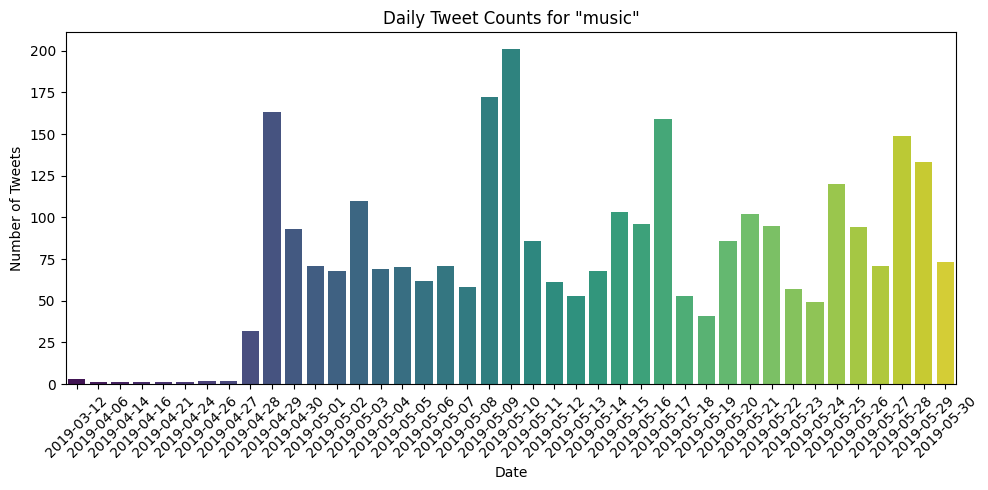

-----------------------------------------------------------
-----------------------------------------------------------
How many unique users posted a tweet containing the term?

Unique Users Count: 2109
-----------------------------------------------------------
-----------------------------------------------------------
How many likes did tweets containing the term get, on average?

Average Likes: 161.40853048983672
-----------------------------------------------------------
-----------------------------------------------------------
Where (in terms of place IDs) did the tweets come from?

Place IDs: [nan '53504716d445dcad' 'ab2f2fac83aa388d' '0113afc024d5e0bc'
 '300bcc6e23a88361' '8e9665cec9370f0f' 'd56c5babcffde8ef'
 '01153d1b33e1641b' '09f6a7707f18e0b1' '714789cf3b7a50d0'
 '01fbe706f872cb32' '1a7a70d4a28e96a1' 'f97108ab3c4a42ed'
 'ac88a4f17a51c7fc' '5de8cffc145c486b' '3f7a925ec706ea48'
 '001aff55522d96c9' '4c8e28554110ebcf' '5c62ffb0f0f3479d'
 '3b77caf94bfc81fe' 'ecbe2aea853af44e'


Top User: freqnetwork


In [103]:
# Get daily tweet counts
print("How many tweets were posted containing the term on each day?")
print(daily_tweet_count(df, term))
daily_tweet_count_and_plot(df, "music")

print("-----------------------------------------------------------")
print("-----------------------------------------------------------")

# Get unique user count
print("How many unique users posted a tweet containing the term?")
print("\nUnique Users Count:", unique_users_count(df, term))

print("-----------------------------------------------------------")
print("-----------------------------------------------------------")

# Get average likes
print("How many likes did tweets containing the term get, on average?")
print("\nAverage Likes:", average_likes(df, term))

print("-----------------------------------------------------------")
print("-----------------------------------------------------------")

# Get unique place IDs
print("Where (in terms of place IDs) did the tweets come from?")
print("\nPlace IDs:", place_ids(df, term))

print("-----------------------------------------------------------")
print("-----------------------------------------------------------")

# Get tweet times
print("\nTweet Times:")
print("What times of day were the tweets posted at? ")
print(tweet_times(df, term))


print("-----------------------------------------------------------")
print("-----------------------------------------------------------")

# Get top user
print("Which user posted the most tweets containing the term?")
print("\nTop User:", top_user(df, term))